In [1]:
using Polynomials
using Plots
using Roots
using QuadGK

INFO: Recompiling stale cache file /home/artur/.julia/lib/v0.6/Roots.ji for module Roots.
INFO: Recompiling stale cache file /home/artur/.julia/lib/v0.6/QuadGK.ji for module QuadGK.


In [4]:
function legendre(n)
    p0 = Poly([1.])
    p1 = Poly([0., 1.]) 
    if(n == 0)
        return p0
    elseif(n == 1)
        return p1
    else
        return ((2*n-1)/(n))*p1*legendre(n-1) - ((n-1)/n)*legendre(n-2)
    end
end

legendre (generic function with 1 method)

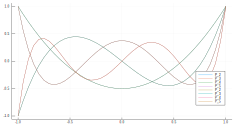

In [6]:
x = -1.:0.05:1.
for i = 2:5
    y = legendre(i)(x)
    p = plot!(x, y, label = "P_$i")
end
plot!(size = (950, 500), legend = :bottomright)

In [12]:
for i = 2:7
    leg = find_zeros(legendre(i), -1., 1.)
    (ga, a) = gauss(Float64, i)
    println(isapprox(leg, ga))
end

true
true
true
true
true
true


In [13]:
# Zad2
function integrate(f, k)
    (xp, w) = gauss(Float64, k)
    sum(w .* f.(xp))  
end

integrate (generic function with 1 method)

In [18]:
eps = 1.0e-9

for quad_deg = 1:5     
    exact = true
    poly_deg = 0
    p = Poly([rand()])
    
    while exact   
        p *= Poly([rand(), rand()])
        poly_deg += 1
        diff = abs(integrate(p, quad_deg) - polyint(p, -1, 1))    
        if diff > eps
            exact = false
        end
    end
    
    println("quadrature degree ", quad_deg, " is exact up to ", poly_deg - 1, "-degree polynomial\n")
end

quadrature degree 1 is exact up to 1-degree polynomial

quadrature degree 2 is exact up to 3-degree polynomial

quadrature degree 3 is exact up to 5-degree polynomial

quadrature degree 4 is exact up to 7-degree polynomial

quadrature degree 5 is exact up to 9-degree polynomial



In [19]:
#zad3
function integrate(f, k, a, b)
    fn = x -> f((b + a)/2 + (b - a) / 2 * x)
    return (b - a)/2 * integrate(fn, k)
end

integrate (generic function with 2 methods)

In [21]:
p1 = Poly([10.1, 502.44, 123.5])
println("error: ", abs(polyint(p1, -20.12, 30.4) - integrate(p1, 4, -20.12, 30.4)))

error: 4.656612873077393e-10


In [22]:
#zad4
p1 = Poly([10.1, 502.44, 123.5])
println(quadgk(p1, -5, 7))

(25416.48, 0.0)


In [23]:
gaussian = x -> (1 / (sqrt(2 * pi))) * exp(-(x * x) / 2)
println(quadgk(gaussian, -Inf, Inf))

(1.0000000000032583, 1.4395584941504537e-8)


In [24]:
#zad5
function rect(a,b,f,k)
    width = (b-a)/k
    points = (a+width):width:b
    widthSum = 0
    for i = points
       widthSum += f(i) 
    end
    widthSum*width
end

rect (generic function with 1 method)

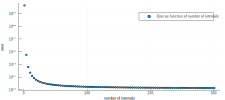

In [27]:
p = Poly([10.1, 502.44, 123.5, 12.55252])
a = 2.0
b = 3.0
exact_result = polyint(p1, a, b)
intervals_number = 1:3:301
err = [abs(exact_result - rect(a, b, p, n)) for n in intervals_number]
scatter(
    intervals_number,
    err,
    xlabel = "number of intervals",
    ylabel = "error",
    label = "Error as function of number of intervals",
    yscale = :log10,
    size = (900, 400)
)